# Ford Gobike EDA


## Investigation Overview

The goal of the analysis is to find the key insights from the data, identifying business questions and providing solutions, and extract helpful information that helps the business in several fields like the marketing strategies they make.

## Dataset Overview

There are 183412 fordgobike trips in the dataset with 16 specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Out of 16 specifications 9 are numerical, 2 are datetime and 5 are object type.

In [1]:
# importing the libraries I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import time
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Question 1: What is the top 10 start and end stations for our trips? 

### Top 10 Start and End Stations

In [4]:
top10startStations = bikes['start_station_name'].value_counts()[:10].index.tolist()
top10endStations = bikes['end_station_name'].value_counts()[:10].index.tolist()
lowest10startStations = bikes['start_station_name'].value_counts(ascending=False)[:10].index.tolist()
lowest10endStations = bikes['end_station_name'].value_counts(ascending=False)[:10].index.tolist()

In [5]:
t10ss_values = [2283,2293,2327,2703,2710,2760,2895,3052,3544,3904]
t10es_values = [2338,2353,2512,2872,2947,2997,3368,3647,3973,4857]
l10ss_values = [2,4,4,7,9,13,17,17,18,18]
l10es_values = [5,6,6,7,9,11,12,16,19,20]

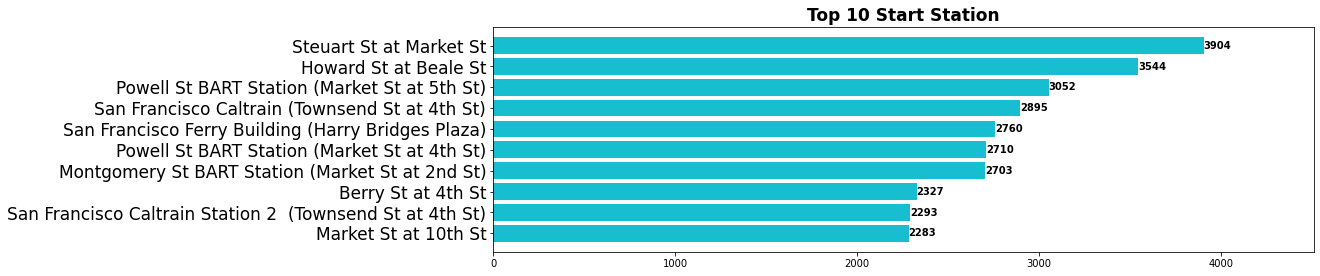

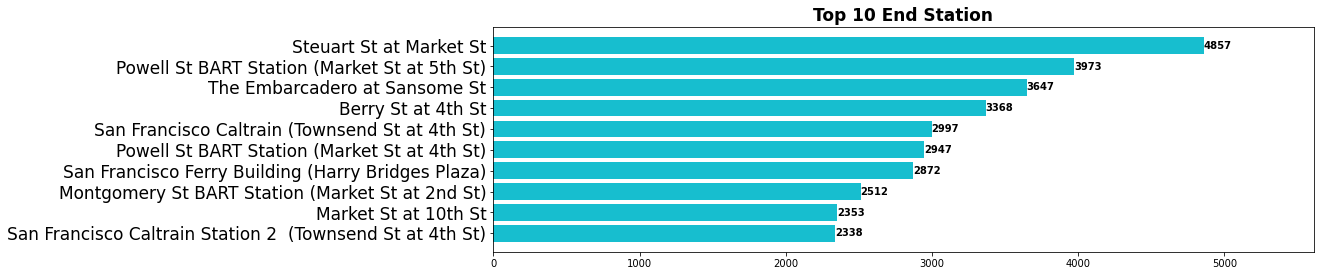

In [6]:
ind = np.arange(len(t10ss_values))
fig, ax = plt.subplots(figsize=[14.70, 8.27/2])
plt.title('Top 10 Start Station',size=17, fontweight='bold')
ax.barh(ind, t10ss_values,color='tab:cyan')
ax.set_yticks(ind)
ax.set_yticklabels(top10startStations,size=17)
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], color='black', fontweight='bold');

ind = np.arange(len(t10es_values))
fig, ax = plt.subplots(figsize=[14.70, 8.27/2])
plt.title('Top 10 End Station',size=17, fontweight='bold')
ax.barh(ind, t10es_values,color='tab:cyan')
ax.set_yticks(ind)
ax.set_yticklabels(top10endStations,size=17)
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], color='black', fontweight='bold');

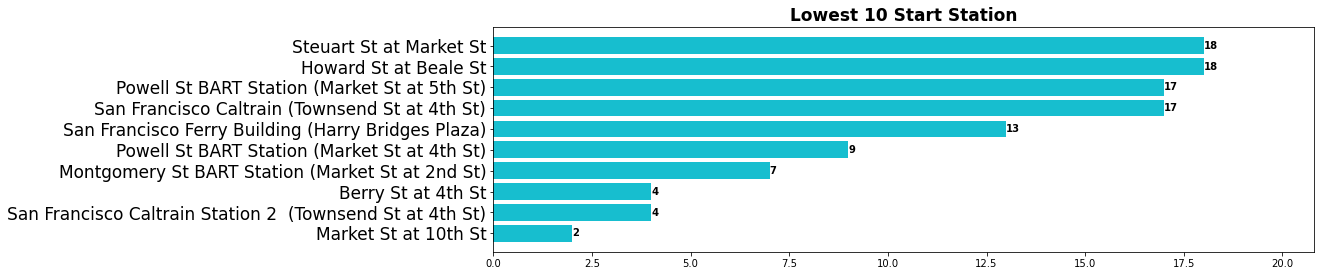

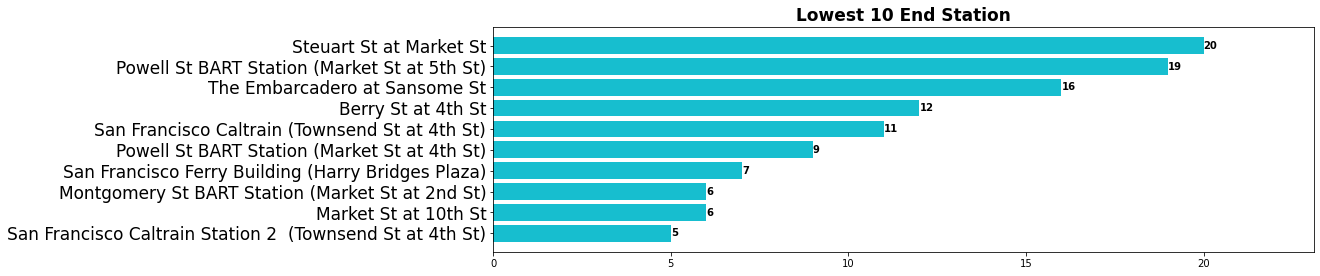

In [7]:
ind = np.arange(len(l10ss_values))
fig, ax = plt.subplots(figsize=[14.70, 8.27/2])
plt.title('Lowest 10 Start Station',size=17, fontweight='bold')
ax.barh(ind, l10ss_values,color='tab:cyan')
ax.set_yticks(ind)
ax.set_yticklabels(lowest10startStations,size=17)
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], color='black', fontweight='bold');

ind = np.arange(len(l10es_values))
fig, ax = plt.subplots(figsize=[14.70, 8.27/2])
plt.title('Lowest 10 End Station',size=17, fontweight='bold')
ax.barh(ind, l10es_values,color='tab:cyan')
ax.set_yticks(ind)
ax.set_yticklabels(lowest10endStations,size=17)
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], color='black', fontweight='bold');

## We have determined the top 10 start and end stations. This information tells us how to distribute the bikes as we might put more bikes in these stations than other. And also increasing the marketing campaign for the less used stations to grab more users.

# Question 2: What is the dominant gender and dominant user type?

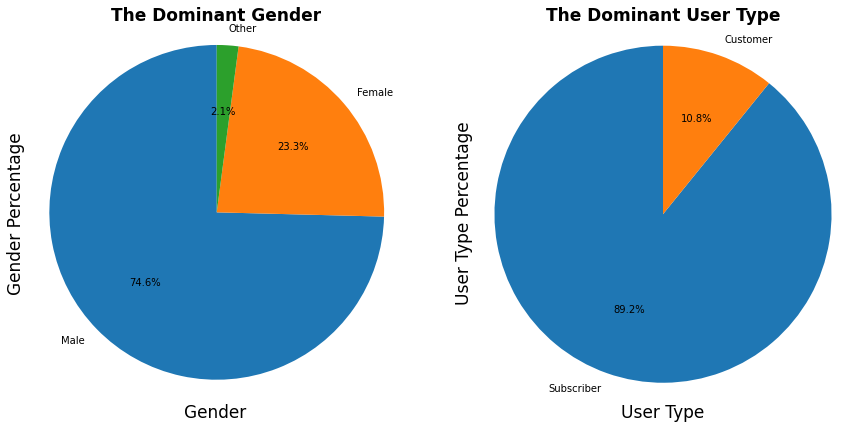

In [8]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1,2,1)
sorted_gender = bikes['member_gender'].value_counts()
plt.pie(sorted_gender, labels=sorted_gender.index, startangle = 90, autopct = '%1.1f%%')
plt.title('The Dominant Gender',size=17, fontweight='bold')
plt.axis('square');
plt.xlabel('Gender',size=17)
plt.ylabel('Gender Percentage',size=17);

plt.subplot(1,2,2)
sorted_type = bikes['user_type'].value_counts()
plt.pie(sorted_type, labels = sorted_type.index, startangle = 90, autopct = '%1.1f%%')
plt.title('The Dominant User Type',size=17, fontweight='bold')
plt.axis('square');
plt.xlabel('User Type',size=17)
plt.ylabel('User Type Percentage',size=17);

### From these plots, we can determine that males are the dominant gender by the percentage of 74.6% and the dominant user type is the subscribers by the percentage of 89.2%.

### The analysis of the gender shows that males rent bikes with almost triple the frequency of the females which also can be included in marketing campaign to target the females to grab more females to the company.

### I recommend make discounts for new customers or offers to grab the irregular customers.

# Question 3: What are the proportion of genders for each user type?

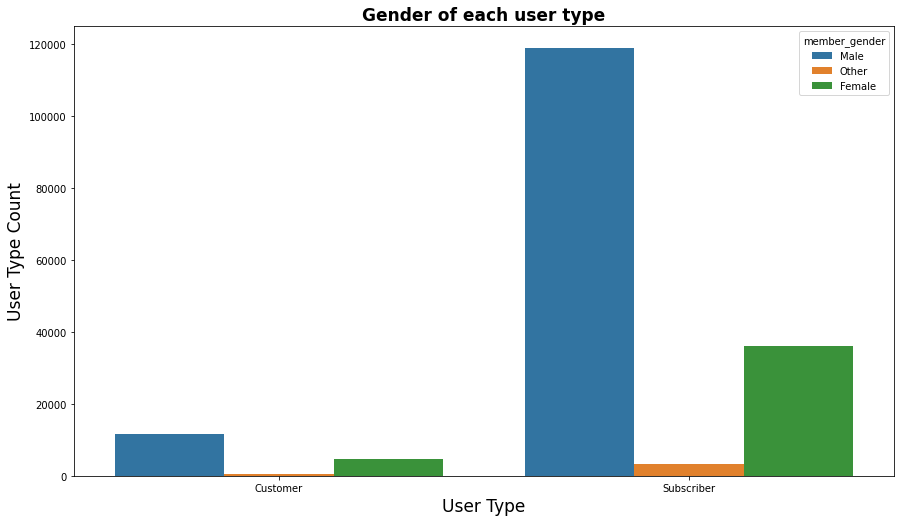

In [9]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=bikes,x='user_type',hue='member_gender');
plt.title('Gender of each user type',size=17, fontweight='bold')
plt.xlabel('User Type',size=17)
plt.ylabel('User Type Count',size=17);

In [10]:
# make sure for the last figure
print("Females ratio of customer user type is:",'{:0.1f}%'.format((4647/19868)*100))
print("Females ratio of Subscriber user type is:",'{:0.1f}%'.format((36197/163544)*100))
print("Males ratio of customer user type is:",'{:0.1f}%'.format(((19868-4647)/19868)*100))
print("Males ratio of Subscriber user type is:",'{:0.1f}%'.format(((163544-36197)/163544)*100))

Females ratio of customer user type is: 23.4%
Females ratio of Subscriber user type is: 22.1%
Males ratio of customer user type is: 76.6%
Males ratio of Subscriber user type is: 77.9%


### Females ratio of customer user type is: 23.4%
### Females ratio of Subscriber user type is: 22.1%
### Males ratio of customer user type is: 76.6%
### Males ratio of Subscriber user type is: 77.9%
### The proportions are so close which tells us that there is no relation between the gender and a user type.

In [11]:
# Extracting the ages from the birth year.
bikes.dropna(inplace=True)

year = []
for i in bikes['member_birth_year']:
    year.append(2019 - i)
    
bikes['age'] = year
bikes['age'].value_counts()

31.0     10214
26.0      9323
30.0      8967
29.0      8640
28.0      8484
         ...  
89.0         1
92.0         1
91.0         1
109.0        1
141.0        1
Name: age, Length: 75, dtype: int64

In [12]:
# remove the outlires (ages above 100)
bikes.drop(bikes[bikes['age'] > 100].index, inplace = True)

# Question 4: What is the most durations we have?
#### We will determine that with the distribution of duration.

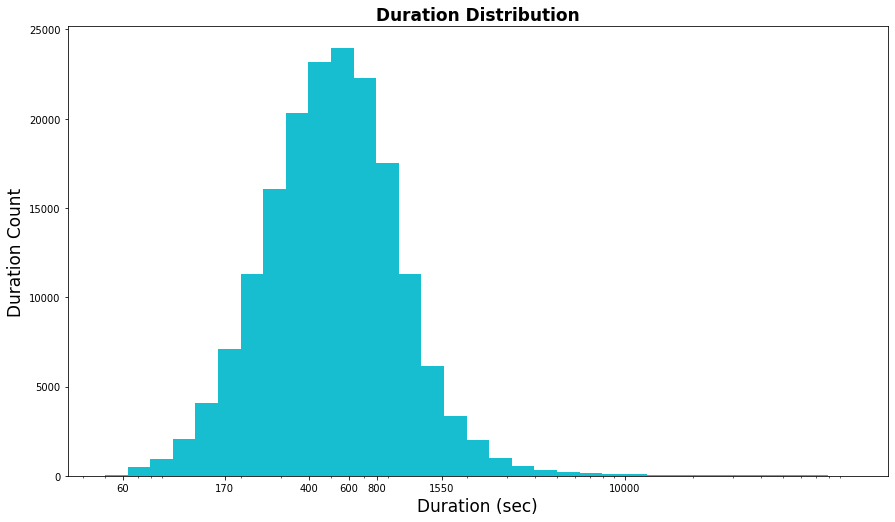

In [13]:
# plotting the distribution of duration with the log scale.
plt.figure(figsize=[14.70, 8.27])

bins = 10 ** np.arange(1.7, np.log10(bikes['duration_sec'].max())+0.1, 0.1)

plt.hist(data = bikes, x = 'duration_sec', bins = bins,color='tab:cyan')

plt.xscale('log')
plt.xticks([60,170,400,600,800,1550,10000], [60,170,400,600,800,1550,10000])
plt.xlabel('Duration (sec)',size=17)
plt.ylabel('Duration Count',size=17)
plt.title('Duration Distribution',size=17, fontweight='bold');

### most of the trips is between 170sec(3 minutes) to 1550sec(25 minutes) and they centered around 600sec(10 minutes).

# Question 5: What is the age of most of our users?

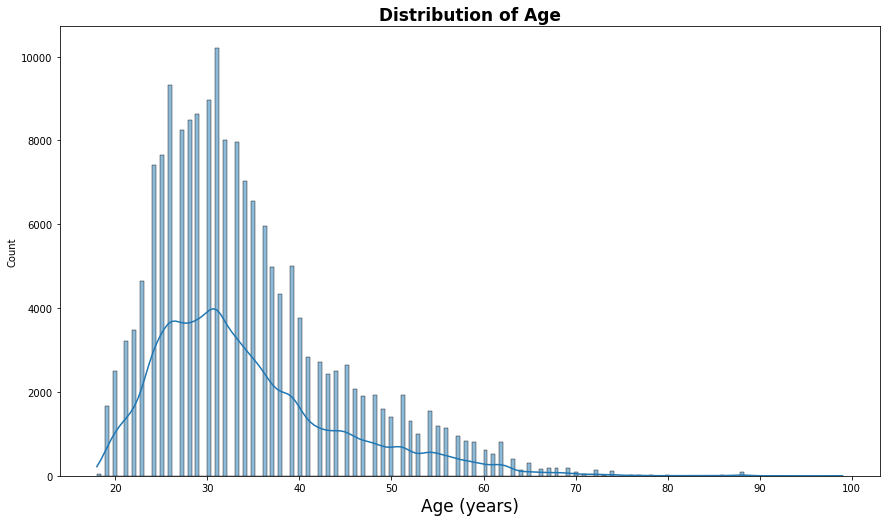

In [14]:
# plotting the distribution of age.
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
sb.histplot(data = bikes, x = 'age', color = base_color, kde=True);
plt.title('Distribution of Age',size=17, fontweight='bold')
plt.xlabel('Age (years)',size=17)
plt.show()

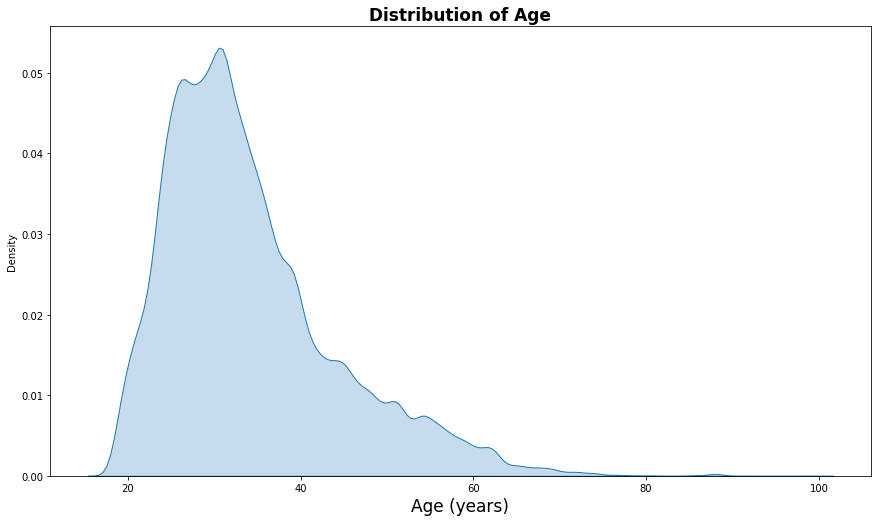

In [15]:
# plotting the distribution of age for all genders.
plt.figure(figsize=[14.70, 8.27])
sb.kdeplot(bikes['age'], shade=True)
plt.title('Distribution of Age',size=17, fontweight='bold')
plt.xlabel('Age (years)',size=17)
plt.show()

### From these plots, we can determine the most age range is between 20 and 50 and the most one is around 20 and 40.

# Question 6: Is there any relation between the age and trip duration ( Do you think younger people bike longer than older people )?

### We will determine that with several plots.

### Lets see the scatter plot and heat map for ages vs durations.

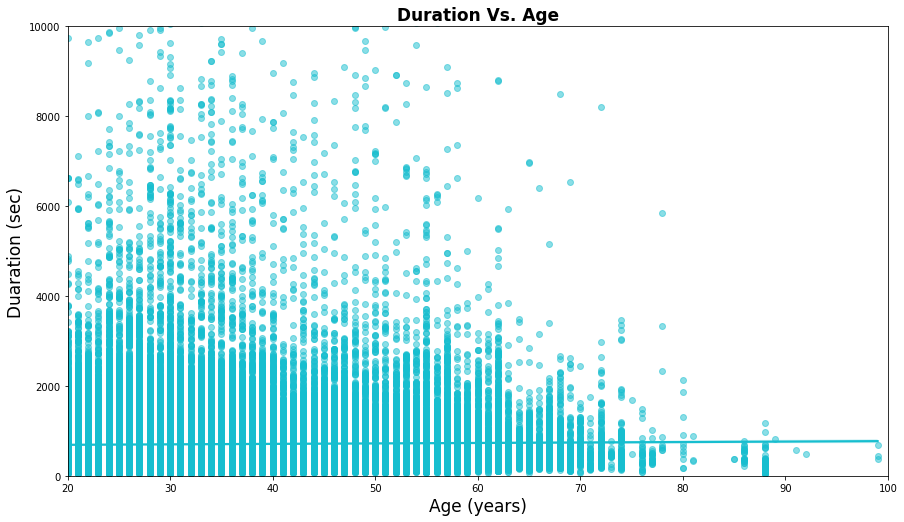

In [16]:
plt.figure(figsize=[14.70, 8.27])
sb.regplot(data=bikes,x = 'age',y = 'duration_sec',scatter_kws = {'alpha':0.5},color='tab:cyan')
plt.axis([20, 100, 0, 10000 ])
plt.xlabel('Age (years)',size=17)
plt.ylabel('Duaration (sec)',size=17)
plt.title('Duration Vs. Age',size=17, fontweight='bold');

### We can see a flat line which means that no relation between being young and bike for a longer time.

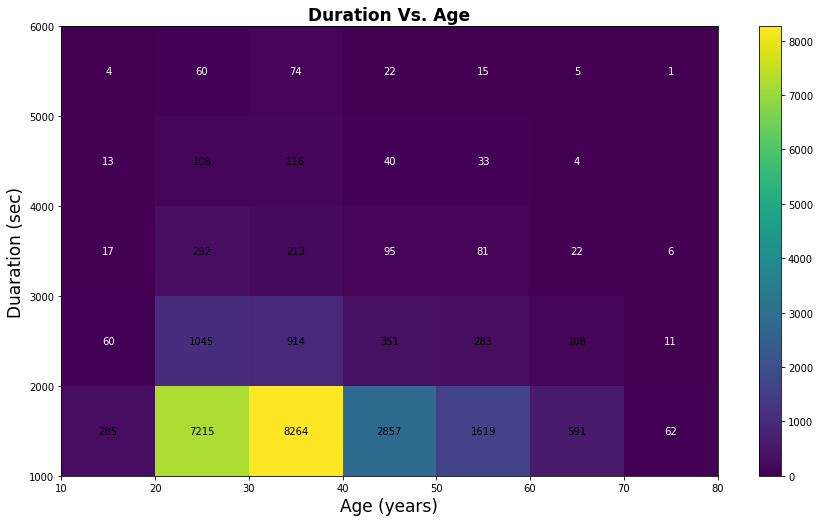

In [17]:
plt.figure(figsize=[14.70, 8.27])
bins_x = np.arange(10, 90, 10)
binwidth_x = 10
bins_y = np.arange(1000, 7000, 1000)
binwidth_y = 1000
plot = plt.hist2d((bikes['age']), bikes['duration_sec'], bins = [bins_x,bins_y])
plt.colorbar()
plt.xlabel('Age (years)',size=17)
plt.ylabel('Duaration (sec)',size=17)
plt.title('Duration Vs. Age',size=17, fontweight='bold')

counts = plot[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+(0.5*binwidth_x), bins_y[j]+(0.5*binwidth_y), int(c),
                     ha = 'center', va = 'center', color = 'black')
        elif c > 0:
            plt.text(bins_x[i]+(0.5*binwidth_x), bins_y[j]+(0.5*binwidth_y), int(c),
                     ha="center", va="center", color = 'white')
plt.show();

### We can see that the higher duration trips occurred in the age range of 20 to 40 and under 2000sec(33 Minutes).

# Question 7: What is the higher number of users ages for each gender (Is there a specific gender that has a higher count in a specific age range)?

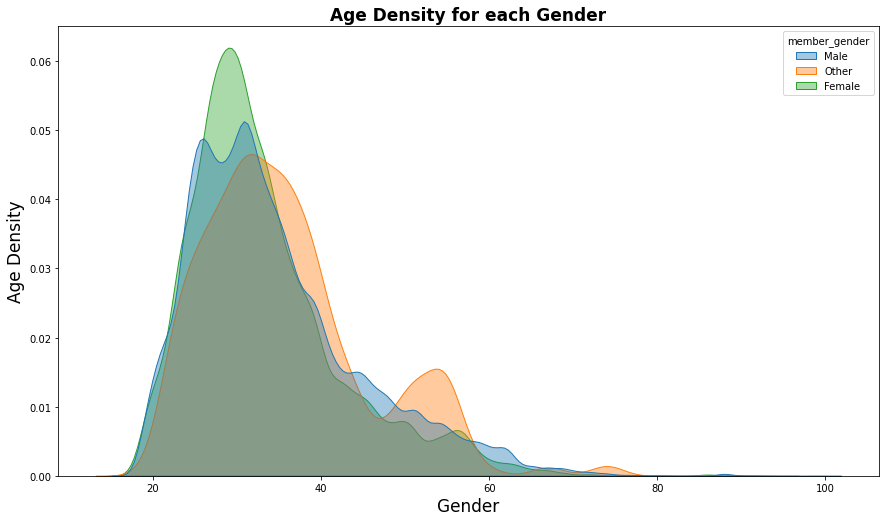

In [18]:
# plotting the density of age for each genders alone.
plt.figure(figsize=[14.70, 8.27])
sb.kdeplot(data=bikes, x="age", hue="member_gender", fill=True, common_norm=False, alpha=0.4)
plt.title('Age Density for each Gender',size=17, fontweight='bold')
plt.xlabel('Gender',size=17)
plt.ylabel('Age Density',size=17);

# The Surprise!

### We can see that the density of ages for females hit the higher values and comes after females the male's one then the other gender and noticed that the other gender age density is jumped again in range 46 to 58 years old which it is a surprise!.

In [19]:
bikes['age'] = bikes['age'].apply(lambda x: (x//10)*10)
bikes['age'].unique() 

array([30., 40., 60., 20., 10., 50., 70., 80., 90.])

# Question 8: What is the dominant gender for each age group?

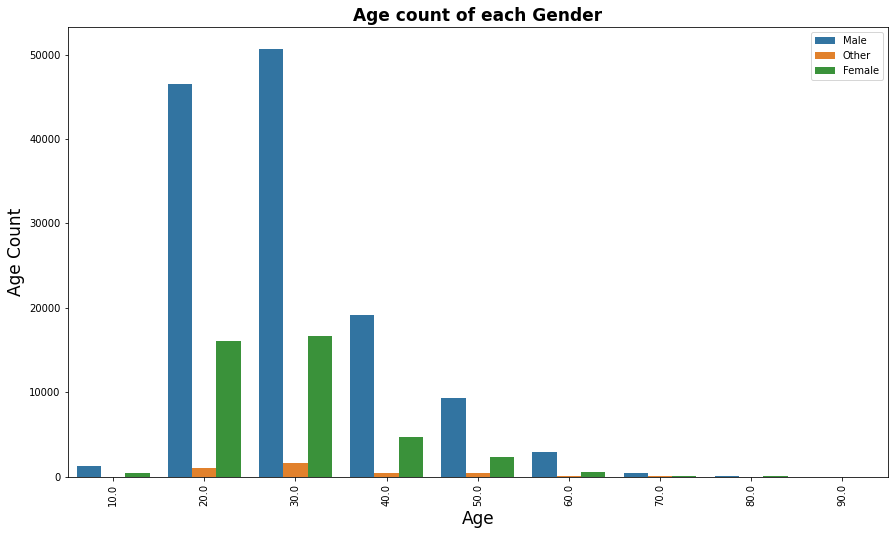

In [20]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=bikes,x='age',hue='member_gender');
plt.xticks(rotation=90)
plt.title('Age count of each Gender',size=17, fontweight='bold')
plt.xlabel('Age',size=17)
plt.ylabel('Age Count',size=17)
plt.legend(loc='upper right');

### Males dominate in all age groups and we can see that around the age of 30 is the highest one between all genders.
### Females count considers being the same in 2 age groups (20 and 30).

# Question 9: Are all genders have the same duration distribution and duration medians?

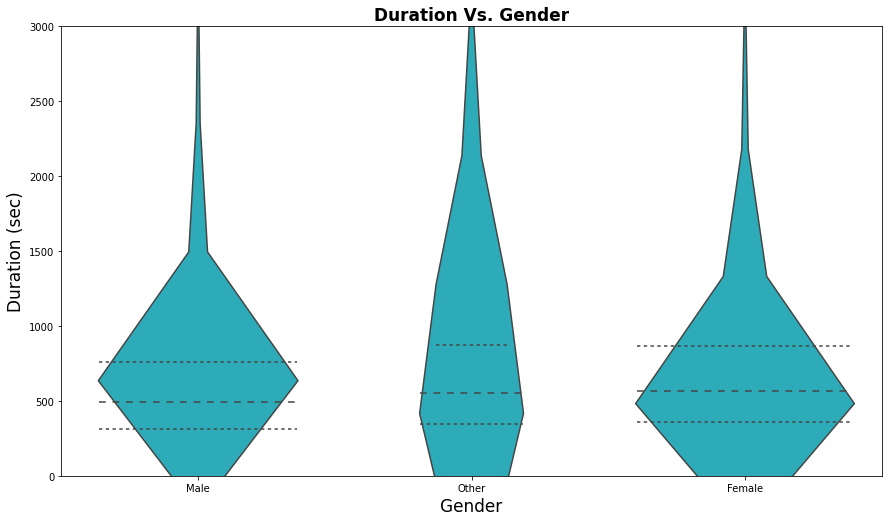

In [21]:
plt.figure(figsize=[14.70, 8.27])
sb.violinplot(data = bikes, x = 'member_gender', y = 'duration_sec',inner='quartile',color='tab:cyan')
plt.ylim([0, 3000])
plt.xlabel('Gender',size=17)
plt.ylabel('Duration (sec)',size=17)
plt.title('Duration Vs. Gender',size=17, fontweight='bold');
plt.show();

### The other gender has a wide distribution which means that they changing smoothly over all durations and I think that is back to the high jump they made from age 46 to 58.

### we can see that the female's median duration is higher than the males and have longer trips than males although the number of males is the higher, and the other gender has the longest trips overall.

# Question 10: Is there a user type that has higher duration rates?

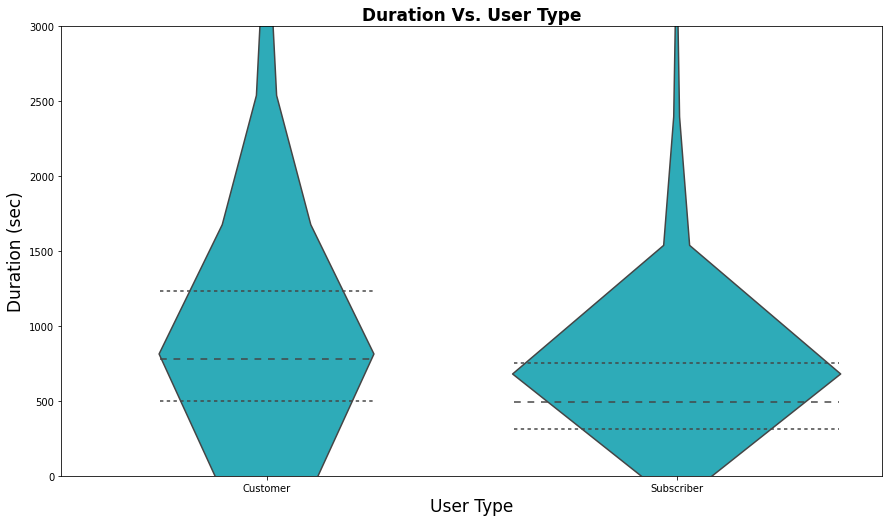

In [22]:
plt.figure(figsize=[14.70, 8.27])
sb.violinplot(data = bikes, x = 'user_type', y = 'duration_sec',inner='quartile',color='tab:cyan')
plt.ylim([0, 3000])
plt.xlabel('User Type',size=17)
plt.ylabel('Duration (sec)',size=17)
plt.title('Duration Vs. User Type',size=17, fontweight='bold')
plt.show();

### We can see that the Customer has a longer trip duration and a higher average duration than the subscriber.

# Question 11: In different age groups, does the average trip duration differ for each gender?

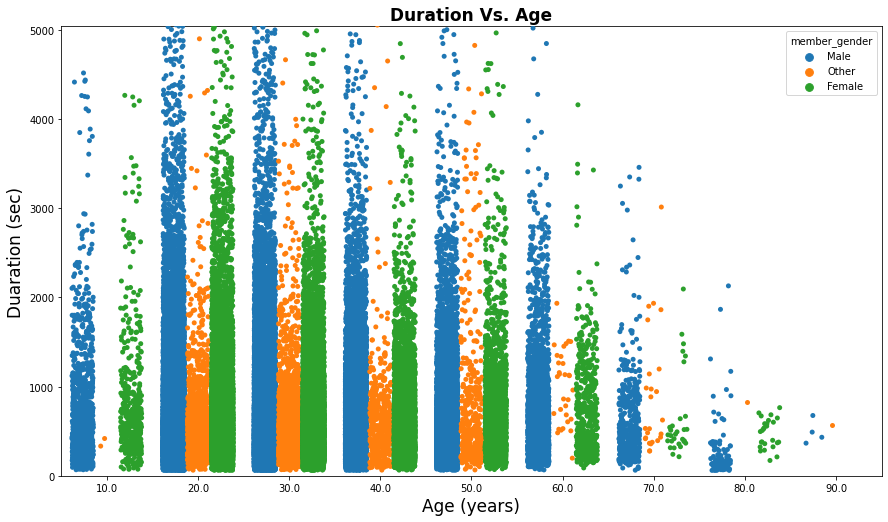

In [23]:
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = bikes, x = 'age', y = 'duration_sec',
              hue = 'member_gender',order = sorted(bikes['age'].unique()),
             jitter=0.35,dodge=True)
plt.xlabel('Age (years)',size=17)
plt.ylabel('Duaration (sec)',size=17)
plt.title('Duration Vs. Age',size=17, fontweight='bold')
plt.ylim(0,bikes.duration_sec.quantile(0.995))
plt.show();

### It is obvious that the 20 to 50 age range is dominant for all genders in all duration levels and also we noticed that the males have the highest trip durations and females come after, and finally the other gender.
### Also we noticed that the other gender is not active in ages of 10,80,90 and the females disappear at the age of 90.

# Question 12: In different age groups, does the average trip duration differ for each user type?

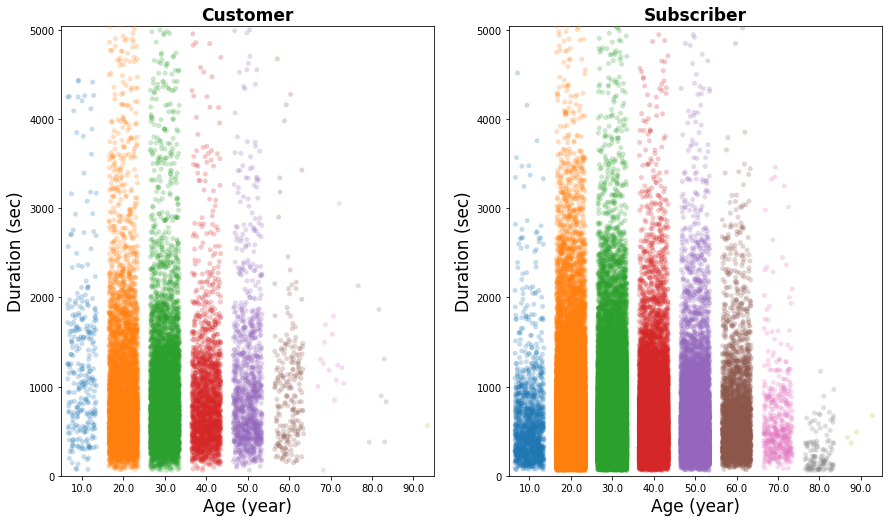

In [24]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1,2,1)
bikesUserType = bikes[bikes['user_type'] == 'Customer']
sb.stripplot(data = bikesUserType,x='age', y='duration_sec', alpha=0.25,order = sorted(bikes['age'].unique()),
             jitter=0.35,dodge=True)
#plt.axis([20, 80, 0, 10000 ])
plt.ylim(0,bikes.duration_sec.quantile(0.995))
plt.xlabel('Age (year)',size=17)
plt.ylabel('Duration (sec)',size=17)
plt.title('Customer',size=17, fontweight='bold')
plt.subplot(1,2,2)
bikesUserType = bikes[bikes['user_type'] == 'Subscriber']
sb.stripplot(data = bikesUserType,x='age', y='duration_sec', alpha=0.25,order = sorted(bikes['age'].unique()),
             jitter=0.35,dodge=True)
#plt.axis([20, 80, 0, 10000 ])
plt.ylim(0,bikes.duration_sec.quantile(0.995))
plt.xlabel('Age (year)',size=17)
plt.ylabel('Duration (sec)',size=17)
plt.title('Subscriber',size=17, fontweight='bold')
plt.show();

### We can determine that the subscribers have a higher density in the low and mid duration, and the high durations is for the customers.

In [25]:
df = bikes.copy()

In [26]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
age                        float64
dtype: object

In [27]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [28]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
age                               float64
dtype: object

In [29]:
start_count = df.groupby('start_time')[['start_station_id']].count()

In [30]:
start_count

,start_station_id
start_time,
2019-02-01 00:00:20.636,1
2019-02-01 00:04:40.616,1
2019-02-01 00:04:49.724,1
2019-02-01 00:05:34.360,1
2019-02-01 00:05:34.744,1
...,...
2019-02-28 23:55:35.104,1
2019-02-28 23:56:26.848,1
2019-02-28 23:56:55.540,1


In [31]:
start_count['day_of_week'] = start_count.index.day_name()

In [32]:
rush_day_eda = start_count.groupby('day_of_week').sum()

# Question 13: What is the rush day?

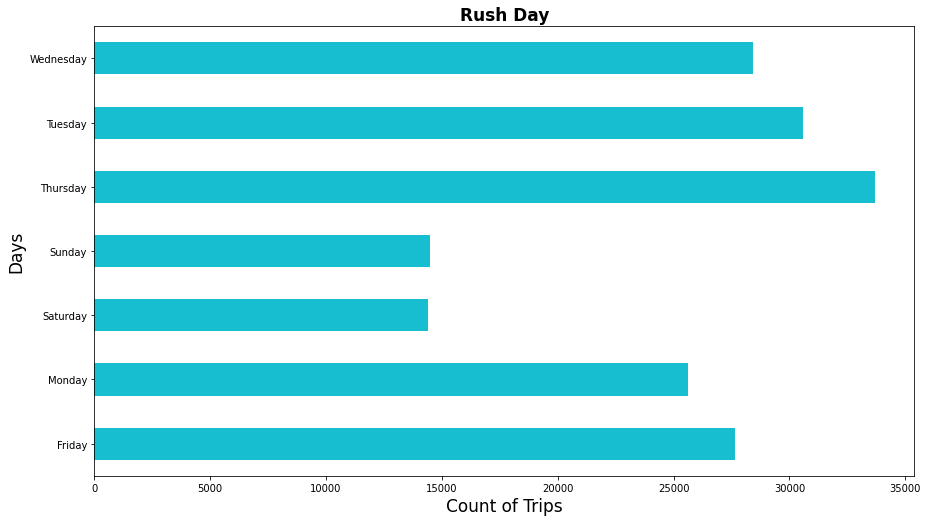

In [33]:
rush_day_eda.plot(kind='barh',figsize=[14.70, 8.27],color='tab:cyan',legend=None);
plt.xlabel('Count of Trips',size=17)
plt.ylabel('Days',size=17)
plt.title('Rush Day',size=17, fontweight='bold')
plt.show();

### We can see that our rush day is Thursday. Sunday and Saturday is the lowest one because they are the weekend.

In [34]:
start_count['hour_of_day'] = start_count.index.hour

In [35]:
rush_hour_eda = start_count.groupby('hour_of_day').sum()

# Question 14: What is the rush hour?

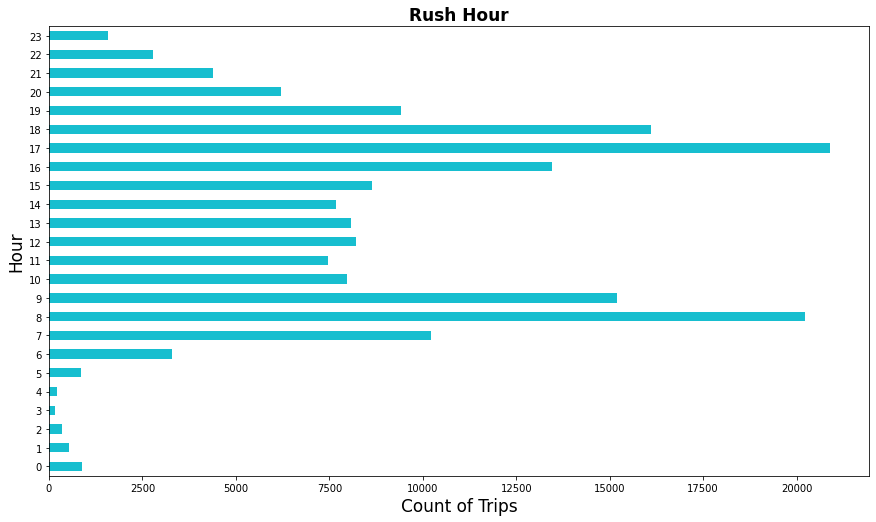

In [36]:
rush_hour_eda.plot(kind='barh',figsize=[14.70, 8.27],color='tab:cyan',legend=None);
plt.xlabel('Count of Trips',size=17)
plt.ylabel('Hour',size=17)
plt.title('Rush Hour',size=17, fontweight='bold')
plt.show();

### We can see that our rush hour is 7 to 9 which makes sense as they are the start work hours and also 16 to 18 which the end of the working day.

In [37]:
one_week = start_count['start_station_id'].resample('1W').sum()

# Question 15: Is there any helpful info about the weeks' performance?

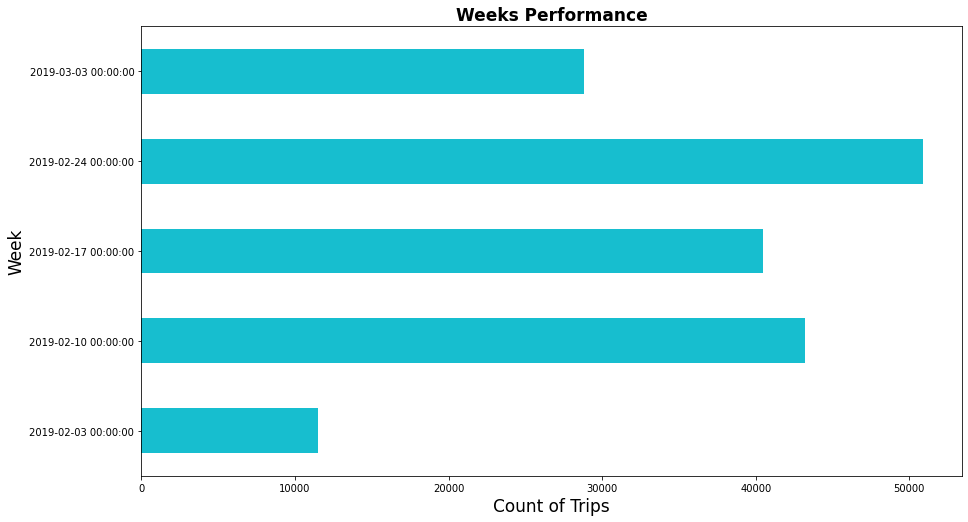

In [38]:
one_week.plot(kind='barh',figsize=[14.70, 8.27],color='tab:cyan',legend=None);
plt.xlabel('Count of Trips',size=17)
plt.ylabel('Week',size=17)
plt.title('Weeks Performance',size=17, fontweight='bold')
plt.show();

### We can see that the first week haven't a great performance, but the performance increased onwards until the last week is came down again, not like the first week but it still a downwards, so we recommend making promotions to increase the subscribers again taking in count that 2 of March is Texas Independence Day and 3 of march is National Anthem Day which could the reason of the downward.

In [39]:
!jupyter nbconvert VizProject-Investagtion.ipynb --to slides --no-input

[NbConvertApp] Converting notebook VizProject-Investagtion.ipynb to slides
[NbConvertApp] Writing 2061283 bytes to VizProject-Investagtion.slides.html
